<a href="https://colab.research.google.com/github/nicoelbert/deepflash2/blob/master/deepflash2_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Lokale Ausführung mit eigenen Pfaden
*.  Eigene Dateistrukur 



# deepflash2 - Train and Predict Tutorial
This notebook is optmizied to be executed on Google Colab (https://colab.research.google.com). It reproduces the results of the deepflash2 [paper](https://arxiv.org/abs/2111.06693) for semantic and instance segmentation.


*   Please read the instructions carefully.
*   Press the the *play* butten to execute the cells. It will show up between \[     \] on the left side of the code cells. 
*   Run the cells consecutively.

*References*:

Griebel, M., Segebarth, D., Stein, N., Schukraft, N., Tovote, P., Blum, R., & Flath, C. M. (2021). Deep-learning in the bioimaging wild: Handling ambiguous data with deepflash2. arXiv preprint arXiv:2111.06693.

>[deepflash2 - Train and Predict Tutorial](#scrollTo=EzVJo3rXc_cq)

>>[Setup](#scrollTo=rPRgwBd5tmGp)

>>>[Settings](#scrollTo=kLh5-XkeKaiD)

>>>>[Example Data](#scrollTo=iRD035oENxhu)

>>>>[Own Data](#scrollTo=a4WoI8HTS0zP)

>>>[Data preprocessing](#scrollTo=hRcw-4O6KzPk)

>>[Train models](#scrollTo=6e59NnbQc_dL)

>>[Prediction on test set](#scrollTo=M9YnWBq9LDdi)



## Setup
In this section, you will set up the training environment, install all dependencies and connect to the drive with the prepared datasets.

In [18]:
!pip install deepflash2 --q

In [21]:
# Imports
import numpy as np
from deepflash2.all import *
from pathlib import Path

- **Data and models**: Example data and trained models are available on [Google Drive](https://drive.google.com/drive/folders/1r9AqP9qW9JThbMIvT0jhoA5mPxWEeIjs?usp=sharing). To use the data in Google Colab, create a [shortcut](https://support.google.com/drive/answer/9700156?hl=en&co=GENIE.Platform%3DDesktop) of the data folder in your personal Google Drive. This shortcut only has to be created once and doesn't affect your personal Google Drive storage.


In [22]:
# Connect to drive
try:
  from google.colab import drive
  drive.mount('/gdrive')
except:
  print('Google Drive is not available.')

Mounted at /gdrive


### Settings

Choose from the perpared dataset from `PV_in_HC`,  `cFOS_in_HC`, `mScarlet_in_PAG`,  `YFP_in_CTX`, `GFAP_in_HC`. Which are more similar to yours?


In [23]:
DATASET = 'cFOS_in_HC' #@param ["PV_in_HC", "cFOS_in_HC", "mScarlet_in_PAG", "YFP_in_CTX", "GFAP_in_HC"]

SEED = 0 # We used seeds [0,1,2] in our experiemnts
OUTPUT_PATH = Path("/content/predictions") # Save predictions here
MODEL_PATH = Path("/content/models") # Save models here
DATA_PATH = Path('/gdrive/MyDrive/deepflash2-paper/data')
TRAINED_MODEL_PATH= Path('/gdrive/MyDrive/deepflash2-paper/models/')

# deepflash2 config class
cfg = Config(random_state=SEED)

#### Example Data
* [cFOS_Wue](https://drive.google.com/open?id=1u1jAqxRpQh2hjE0W2vdHNCyhQsM5uAis): 
Trained on 36 image-mask pairs of cFOS labels in the dorsal hippocampus (including 12 images of each sub-region: dentate gyrus, CA3 and CA1). Masks for training were prepared by five independent experts. Images were acquired using laser-scanning confocal microscopy with a resolution of 1.6 pixel per µm.
    
    <img src="https://raw.githubusercontent.com/matjesg/DeepFLaSH/master/assets/cFOS_Wue.png" width="250" height="250" alt="cFOS_Wue">
    <img src="https://raw.githubusercontent.com/matjesg/DeepFLaSH/master/assets/cFOS_Wue_mask.png" width="250" height="250" alt="cFOS_Wue_mask">

* [cFOS_Inns1](https://drive.google.com/open?id=1n6oGHaIvhbcBtzrkgWT6igg8ZXSOvE0D): Fine-tuned on [cFOS_Wue](https://drive.google.com/open?id=1u1jAqxRpQh2hjE0W2vdHNCyhQsM5uAis)
with five image-mask pairs of cFOS labels in the amygdala. Masks for fine-tuning were prepared by one expert. Images acquired using epifluorescence microscopy with a resolution of 1 pixel per µm.

    <img src="https://raw.githubusercontent.com/matjesg/DeepFLaSH/master/assets/cFOS_Inns1.png" width="250" height="250" alt="cFOS_Inns1">
    <img src="https://raw.githubusercontent.com/matjesg/DeepFLaSH/master/assets/cFOS_Inns1_mask.png" width="250" height="250" alt="cFOS_Inns1_mask">

* [cFOS_Inns2](https://drive.google.com/open?id=1TGxZC93YUP1kp1xmboxl6fJEqU4oDRzP):
Fine-tuned on [cFOS_Wue](https://drive.google.com/open?id=1u1jAqxRpQh2hjE0W2vdHNCyhQsM5uAis)
with five image-mask pairs of cFOS labels in the infralimbic cortex. Masks for fine-tuning were prepared by one expert. Images acquired using epifluorescence microscopy with a resolution of 2 pixel per µm.

    <img src="https://raw.githubusercontent.com/matjesg/DeepFLaSH/master/assets/cFOS_Inns2.png" width="250" height="250" alt="cFOS_Inns2">
    <img src="https://raw.githubusercontent.com/matjesg/DeepFLaSH/master/assets/cFOS_Inns2_mask.png" width="250" height="250" alt="cFOS_Inns2_mask">

* [cFOS_Mue](https://drive.google.com/open?id=1GFOsnLFY8nKDVcBTX7MvMTjoiYfhs91b):
Fine-tuned on [cFOS_Wue](https://drive.google.com/open?id=1u1jAqxRpQh2hjE0W2vdHNCyhQsM5uAis)
with five image-mask pairs of cFOS labels in the paraventricular nucleus of the thalamus. Masks for fine-tuning were prepared by one expert. Images acquired using laser-scanning confocal microscopy with a resolution of 0.8 pixel per µm.

    <img src="https://raw.githubusercontent.com/matjesg/DeepFLaSH/master/assets/cFOS_Mue.png" width="250" height="250" alt="cFOS_Mue">
    <img src="https://raw.githubusercontent.com/matjesg/DeepFLaSH/master/assets/cFOS_Mue_mask.png" width="250" height="250" alt="cFOS_Mue_mask">

* [Parv](https://drive.google.com/open?id=1VtxyOXhuYVDAC8pkzx3SG9sZfvXqHDZI):
Trained on 36 image-mask pairs of Parvalbumin-labels in the dorsal hippocampus (including 12 images of each sub-region: dentate gyrus, CA3 and CA1). Masks for training were prepared by five independent experts. Images were acquired using laser-scanning confocal microscopy with a resolution of 1.6 pixel per µm.
    
    <img src="https://raw.githubusercontent.com/matjesg/DeepFLaSH/master/assets/Parv.png" width="250" height="250" alt="Parv">
    <img src="https://raw.githubusercontent.com/matjesg/DeepFLaSH/master/assets/Parv_mask.png" width="250" height="250" alt="Parv">

#### Own Data

To use your own data sets, make sure that the folder structure is a described in the graphics below and adjust the `DATA_PATH` variable. You can either reference a folder from your personal google drive, give the url to a publicly available `.zip` file or reference a local folder if you run the notebook locally. 

### Data preprocessing

- Initialize `EnsembleLearner`
- Plot images and masks to show if they are correctly loaded

Found 36 images in "images" and 36 masks in "masks_STAPLE".
Computing Stats...


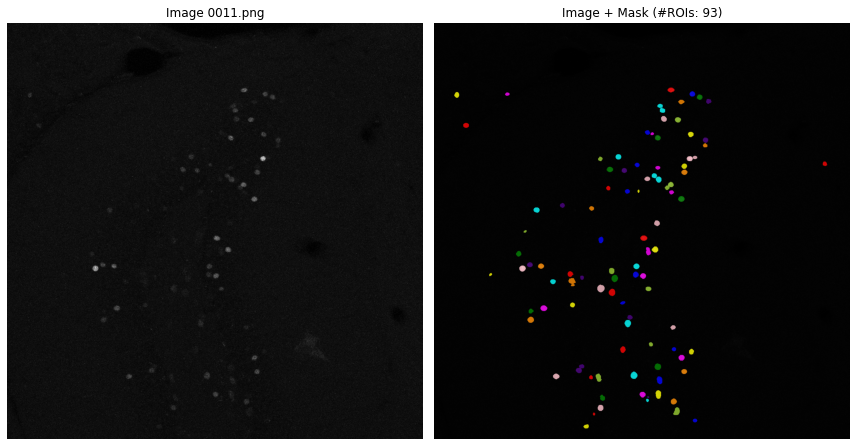

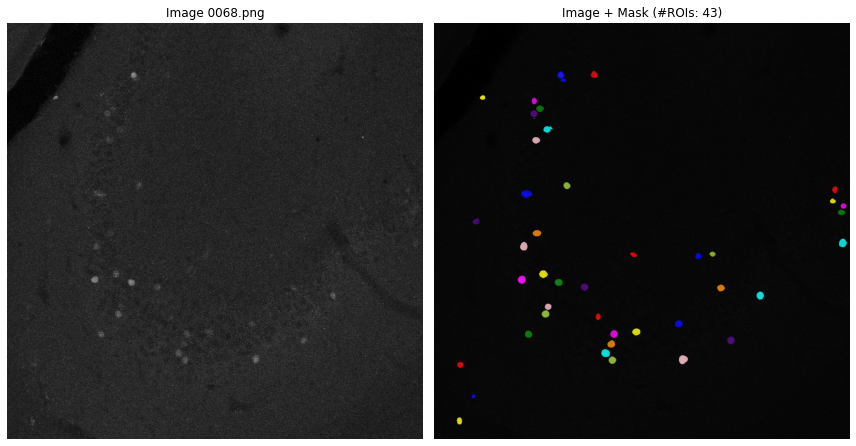

In [24]:
train_data_path = DATA_PATH/DATASET/'train'
ensemble_path = MODEL_PATH/DATASET

el = EnsembleLearner(image_dir='images', 
                     mask_dir='masks_STAPLE', 
                     config=cfg, 
                     path=train_data_path, 
                     ensemble_path=ensemble_path)

el.ds.show_data(max_n=2, overlay=True)

## Train models

- Train model ensemble with 5 models
  - 2500 iterations for each model
- You can skip this step use the trained models from our paper (see next section).

In [ ]:
n_iter = 2500
el.fit_ensemble(n_iter)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

Using preprocessed masks from <zarr.storage.TempStore object at 0x7f04406ec310>
Using preprocessed masks from <zarr.storage.TempStore object at 0x7f04406ec310>


Starting training for Unet_resnet34_2classes-fold1.pth


epoch,train_loss,valid_loss,dice,time
0,0.812373,6.786085,0.061831,01:23


Better model found at epoch 0 with dice value: 0.061831167820589936.


epoch,train_loss,valid_loss,dice,time
0,0.312245,0.307140,0.795294,01:12
1,0.283761,0.263125,0.813610,01:12
2,0.266881,0.270481,0.794101,01:12
3,0.255352,0.245208,0.817137,01:12
4,0.257214,0.232404,0.823993,01:12
5,0.256480,0.261086,0.797499,01:12
6,0.250427,0.278582,0.790726,01:12
7,0.246275,0.216225,0.828894,01:12
8,0.239554,0.225308,0.825517,01:12
9,0.235828,0.241856,0.810305,01:12


Better model found at epoch 0 with dice value: 0.7952937983751053.
Better model found at epoch 1 with dice value: 0.8136096483866225.
Better model found at epoch 3 with dice value: 0.81713744707522.
Better model found at epoch 4 with dice value: 0.8239926198973916.
Better model found at epoch 7 with dice value: 0.8288940074389041.
Better model found at epoch 10 with dice value: 0.8337522002981934.
Better model found at epoch 15 with dice value: 0.8385670662230528.
Better model found at epoch 17 with dice value: 0.8400038862554394.
Better model found at epoch 19 with dice value: 0.8433979698159204.
Saving model at /content/models/cFOS_in_HC/Unet_resnet34_2classes-fold1.pth
Using preprocessed masks from <zarr.storage.TempStore object at 0x7f04406ec310>
Using preprocessed masks from <zarr.storage.TempStore object at 0x7f04406ec310>


Starting training for Unet_resnet34_2classes-fold2.pth


epoch,train_loss,valid_loss,dice,time
0,1.201906,1.096605,0.283689,01:13


Better model found at epoch 0 with dice value: 0.2836890978542003.


epoch,train_loss,valid_loss,dice,time
0,0.572165,0.590049,0.721024,01:09
1,0.442965,0.418137,0.788130,01:09
2,0.343362,0.375477,0.751492,01:09
3,0.285162,0.914914,0.307933,01:09
4,0.268108,0.311963,0.771247,01:09
5,0.253884,0.275948,0.807232,01:09


Better model found at epoch 0 with dice value: 0.721023568685525.
Better model found at epoch 1 with dice value: 0.7881297345433455.
Better model found at epoch 5 with dice value: 0.8072315284794918.


## Prediction on test set

We save
- Semantic segmentation masks (.png)
- Instance segmentation masks (.tif) using the cellpose flow representations
- Foreground uncertainty scores *U*

To ensure reproducibilty we will use the trained models from our paper!

In [ ]:
test_data_path = DATA_PATH/DATASET/'test'
ensemble_trained_path = TRAINED_MODEL_PATH/DATASET/f'{SEED+1}'
prediction_path = OUTPUT_PATH/DATASET

el_pred = EnsembleLearner('images',
                          path=test_data_path, 
                          config=cfg, 
                          ensemble_path=ensemble_trained_path) 

# Predict and save semantic segmentation masks
el_pred.get_ensemble_results(el_pred.files, 
                             use_tta=True, 
                             export_dir=prediction_path/'masks')
# Save uncertainty scores
df_unc = el_pred.df_ens[['file', 'ensemble', 'n_models', 'uncertainty_score']]
df_unc.to_csv(prediction_path/'uncertainty_scores.csv', index=False)

# Show results scores
el_pred.show_ensemble_results()

In [ ]:
# Predict and save instance segmentation masks
el_pred.get_cellpose_results(export_dir=prediction_path/'instance_masks')
el_pred.show_cellpose_results()